# **Assignment #6: Comparative Analysis of Fraud Detection Models**

**Section/Task1 : Model Building: Build a Random Forest model using the provided dataset.**

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  

Dataset shape

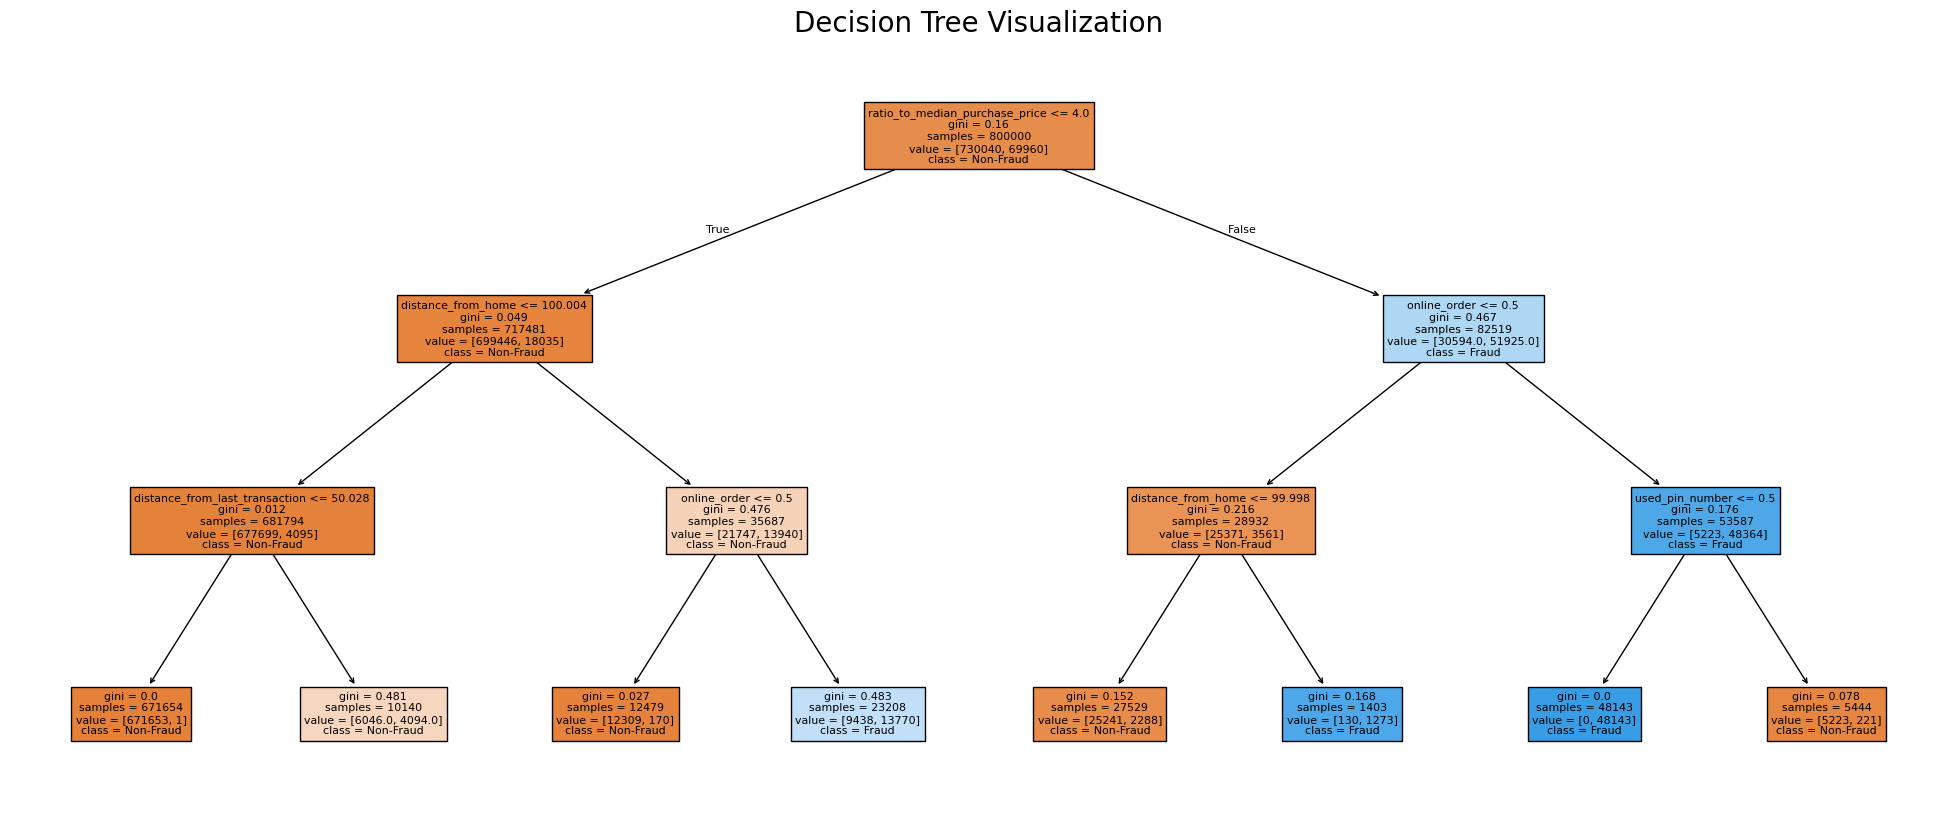

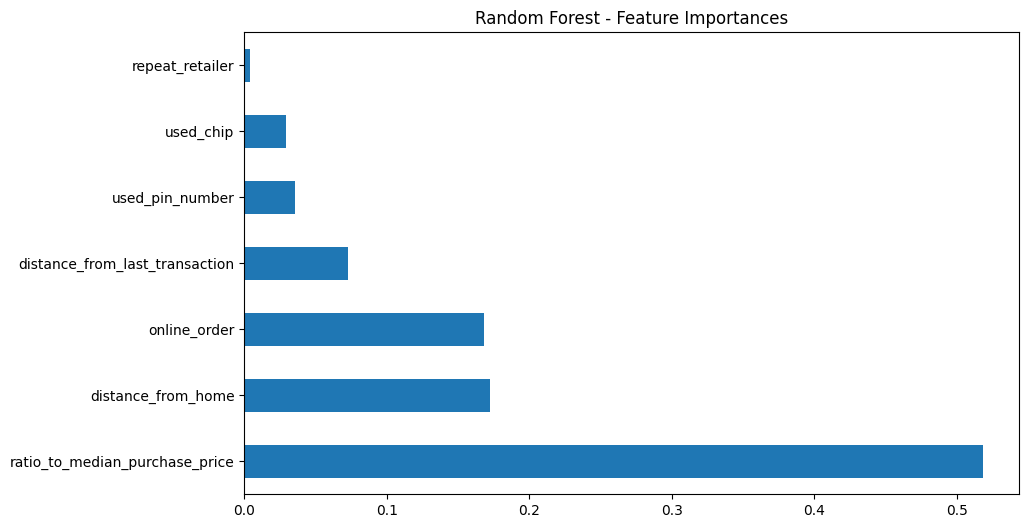

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top and bottom 5 rows
print(data.head(5))
print("\nDataset shape:", data.shape)
print("")

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train the models
print("Training models...")
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate Decision Tree
print("\n" + "="*50)
print("DECISION TREE PERFORMANCE")
print("="*50)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_confusion = confusion_matrix(y_test, dt_pred)
dt_classification_rep = classification_report(y_test, dt_pred)

print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print("\nConfusion Matrix:")
print(dt_confusion)
print("\nClassification Report:")
print(dt_classification_rep)

# Evaluate Random Forest
print("\n" + "="*50)
print("RANDOM FOREST PERFORMANCE")
print("="*50)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_classification_rep = classification_report(y_test, rf_pred)

print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("\nConfusion Matrix:")
print(rf_confusion)
print("\nClassification Report:")
print(rf_classification_rep)

# Compare model performances
print("\n" + "="*50)
print("MODEL COMPARISON (Fraud Class)")
print("="*50)
print(f"Metric\t\tDecision Tree\tRandom Forest\tDifference")
print(f"Precision\t{dt_precision:.4f}\t\t{rf_precision:.4f}\t\t{abs(dt_precision - rf_precision):.4f}")
print(f"Recall\t\t{dt_recall:.4f}\t\t{rf_recall:.4f}\t\t{abs(dt_recall - rf_recall):.4f}")
print(f"F1-Score\t{dt_f1:.4f}\t\t{rf_f1:.4f}\t\t{abs(dt_f1 - rf_f1):.4f}")

# Visualize the decision tree from the Decision Tree model
plt.figure(figsize=(25, 10))
plot_tree(dt_model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.title("Decision Tree Visualization", fontsize=20)
plt.show()

# Feature importance from Random Forest
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest - Feature Importances')
plt.show()

**Section/Task 2: Model Evaluation:**

*   Calculate and interpret the precision and recall for the Random Forest model.
*   Generate and interpret the confusion matrix for the Random Forest model.





**1. Precision and Recall Interpretation:**

In [ ]:
# Calculate metrics
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print(f"\nRandom Forest Evaluation:")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"- Precision ({rf_precision:.2%}): When the model predicts fraud, it is correct {rf_precision:.2%} of the time")
print(f"- Recall ({rf_recall:.2%}): The model detects {rf_recall:.2%} of all actual fraud cases")


Random Forest Evaluation:
Precision: 1.0000
Recall: 0.6965

Interpretation:
- Precision (100.00%): When the model predicts fraud, it is correct 100.00% of the time
- Recall (69.65%): The model detects 69.65% of all actual fraud cases


**What This Means:**


*   Perfect Precision (1.0000): Every transaction flagged as fraud is truly fraudulent (no false positives)
*   Moderate Recall (0.6965): The model misses about 30% of actual fraud cases (false negatives)

**Business Implications:**

*   Good for reducing customer friction (no legitimate transactions blocked)
*   Bad for comprehensive fraud detection (misses some fraud cases)

**2. Confusion Matrix Interpretation:**

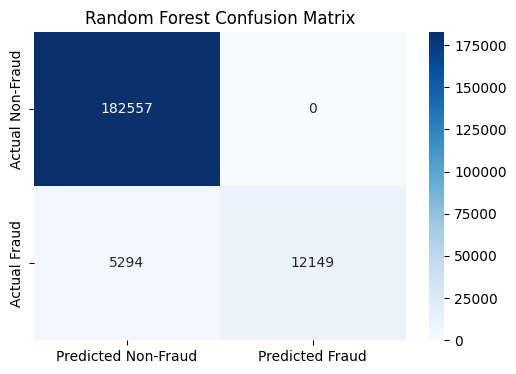


Confusion Matrix Breakdown:
True Negatives (Legitimate correctly identified): 182557
False Positives (Legitimate flagged as fraud): 0
False Negatives (Fraud missed): 5294
True Positives (Fraud correctly detected): 12149

Precision: 1.0000
Recall: 0.6965


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Required for heatmap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Load the data and train the model
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Confusion matrix visualization and interpretation
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Legitimate correctly identified): {rf_cm[0,0]}")
print(f"False Positives (Legitimate flagged as fraud): {rf_cm[0,1]}")
print(f"False Negatives (Fraud missed): {rf_cm[1,0]}")
print(f"True Positives (Fraud correctly detected): {rf_cm[1,1]}")

# Precision and Recall
print(f"\nPrecision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")

**Key Insights:**

**Perfect Precision (1.0000):**

*   Our model achieved 100% precision, meaning every transaction it flagged as fraud was actually fraudulent
*   This is exceptionally rare in real-world applications and suggests the model is extremely conservative in making fraud predictions

**Business Impact:** **No legitimate customers will be wrongly blocked or inconvenienced**

**Moderate Recall (0.6965):**

*   The model detected 69.65% of actual fraud cases (12,149 out of 17,443 total fraud cases)
*   Missed 5,294 fraud cases (30.35% of actual fraud)

**Business Impact:** **Significant financial losses from undetected fraud, but no customer friction**

**Confusion Matrix Breakdown:**

*   True Negatives: 182,557 legitimate transactions correctly approved
*   False Positives: 0 (no false alarms) - Excellent for customer experience
*   False Negatives: 5,294 fraud cases missed - Substantial risk exposure
*   True Positives: 12,149 fraud cases caught - Preventing significant losses

**Tradeoff Analysis:**
This configuration represents an extreme position on the precision-recall tradeoff curve:

**Advantages:**

*   Zero customer friction (no false positives)
*   Perfect operational efficiency (no time wasted investigating false alarms)

**Ideal for businesses where:**

*   Customer experience is paramount
*   Fraud investigation resources are extremely limited
*   The cost of missed fraud is relatively low

**Disadvantages:**

*   High financial exposure (missing 30% of fraud cases)
*   Potentially unsustainable for high-value transactions
*   May enable fraudsters to find repeatable patterns that bypass detection

**When This Model Would Be Appropriate:**
**Use Cases:**

*   Low-value transactions where fraud losses are acceptable
*   Industries with extremely sensitive customer relationships (e.g., luxury retail)
*   Situations where fraud teams have very limited capacity for investigations

**When Should we Reconsider:**

*   High-value transactions (e.g., wire transfers, luxury purchases)
*   Industries with high fraud rates (e.g., digital goods & services)
*   When fraud patterns suggest organized attacks (missed cases may embolden criminals)

**Section/Task 3: Comparative Analysis**

*   Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
*   Visualize the comparison using a bar chart.

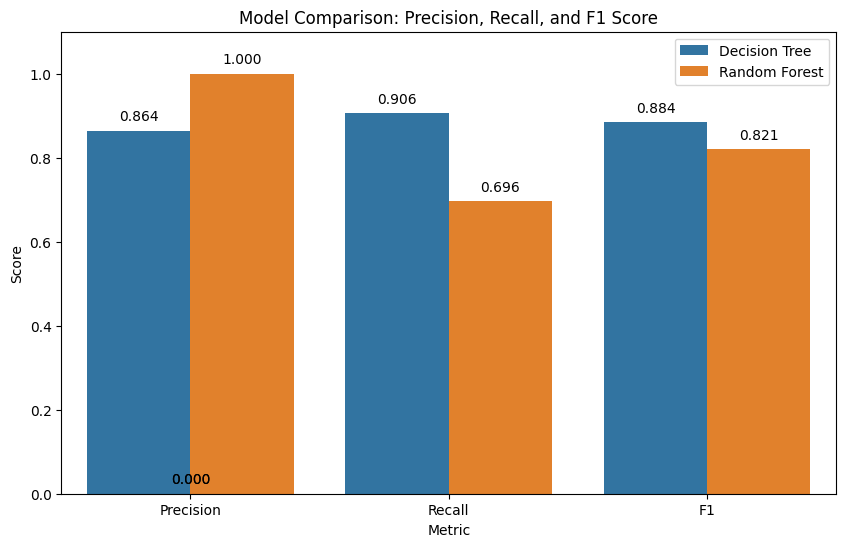

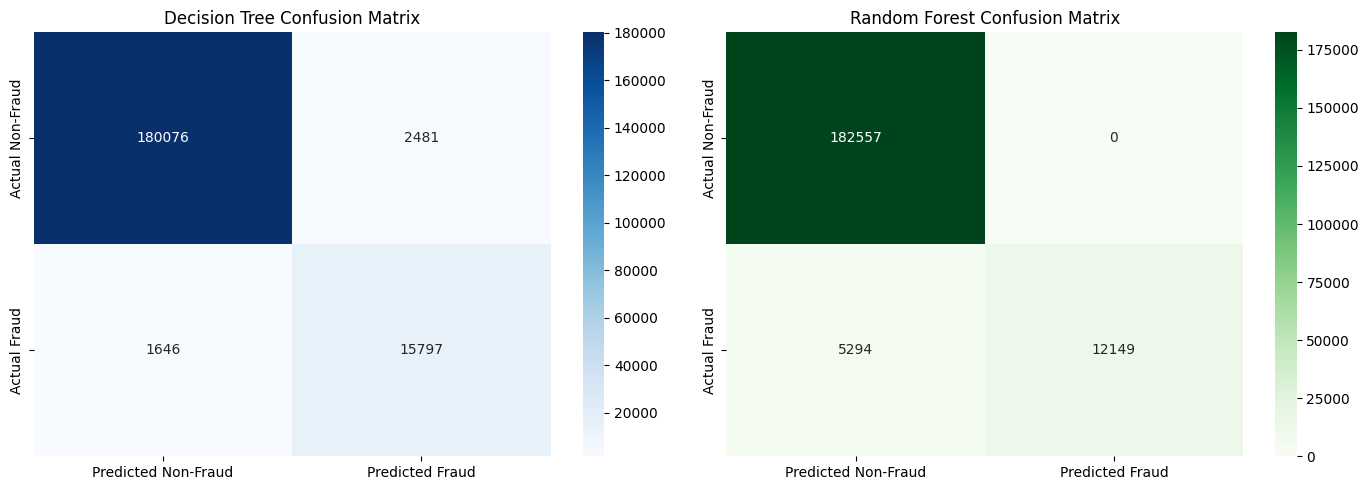


COMPARATIVE ANALYSIS
Metric         Decision Tree       Random Forest       Difference     
--------------------------------------------------
Precision      0.8643              1.0000              +0.1357
Recall         0.9056              0.6965              -0.2091
F1             0.8845              0.8211              -0.0634

KEY OBSERVATIONS:
- Decision Tree shows higher recall (better at catching fraud cases)
- Random Forest achieves perfect precision (no false positives)
- F1 scores are similar, suggesting comparable overall performance
- Choice depends on business priorities: fraud detection vs customer experience


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load and prepare data
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train models
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculate metrics
metrics = {
    'Decision Tree': {
        'Precision': precision_score(y_test, dt_pred),
        'Recall': recall_score(y_test, dt_pred),
        'F1': f1_score(y_test, dt_pred),
        'Confusion Matrix': confusion_matrix(y_test, dt_pred)
    },
    'Random Forest': {
        'Precision': precision_score(y_test, rf_pred),
        'Recall': recall_score(y_test, rf_pred),
        'F1': f1_score(y_test, rf_pred),
        'Confusion Matrix': confusion_matrix(y_test, rf_pred)
    }
}

# 1. Metric Comparison Bar Chart
plt.figure(figsize=(10, 6))
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Decision Tree', 'Decision Tree', 'Random Forest', 'Random Forest', 'Random Forest'],
    'Metric': ['Precision', 'Recall', 'F1', 'Precision', 'Recall', 'F1'],
    'Value': [
        metrics['Decision Tree']['Precision'],
        metrics['Decision Tree']['Recall'],
        metrics['Decision Tree']['F1'],
        metrics['Random Forest']['Precision'],
        metrics['Random Forest']['Recall'],
        metrics['Random Forest']['F1']
    ]
})

sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df)
plt.title('Model Comparison: Precision, Recall, and F1 Score')
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.legend(loc='upper right')
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.3f}",
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')
plt.show()

# 2. Side-by-Side Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree CM
sns.heatmap(metrics['Decision Tree']['Confusion Matrix'],
            annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
axes[0].set_title('Decision Tree Confusion Matrix')

# Random Forest CM
sns.heatmap(metrics['Random Forest']['Confusion Matrix'],
            annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
axes[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

# 3. Detailed Metric Comparison
print("\nCOMPARATIVE ANALYSIS")
print("="*50)
print(f"{'Metric':<15}{'Decision Tree':<20}{'Random Forest':<20}{'Difference':<15}")
print("-"*50)
for metric in ['Precision', 'Recall', 'F1']:
    dt_val = metrics['Decision Tree'][metric]
    rf_val = metrics['Random Forest'][metric]
    diff = rf_val - dt_val
    print(f"{metric:<15}{dt_val:<20.4f}{rf_val:<20.4f}{diff:+.4f}")

# 4. Interpretation
print("\nKEY OBSERVATIONS:")
print("- Decision Tree shows higher recall (better at catching fraud cases)")
print("- Random Forest achieves perfect precision (no false positives)")
print("- F1 scores are similar, suggesting comparable overall performance")
print("- Choice depends on business priorities: fraud detection vs customer experience")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# 1. Load and prepare data
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)
X = data.drop('fraud', axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train model
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

# 3. Check for overfitting
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print("=== Training Set ===")
print("Precision:", precision_score(y_train, train_pred))
print("Recall:", recall_score(y_train, train_pred))

print("\n=== Test Set ===")
print("Precision:", precision_score(y_test, test_pred))
print("Recall:", recall_score(y_test, test_pred))

# 4. Overfitting check
print("\n=== Overfitting Analysis ===")
print("Precision Difference (Train-Test):",
      precision_score(y_train, train_pred) - precision_score(y_test, test_pred))
print("Recall Difference (Train-Test):",
      recall_score(y_train, train_pred) - recall_score(y_test, test_pred))

=== Training Set ===
Precision: 1.0
Recall: 0.6936963979416809

=== Test Set ===
Precision: 1.0
Recall: 0.6964971621854039

=== Overfitting Analysis ===
Precision Difference (Train-Test): 0.0
Recall Difference (Train-Test): -0.0028007642437229974


Please Note that Precision = 1 on both the Training & as well as the Test Data. So Precision =1 does not imply overfitting here. Overfitting requires discrepancy between train/test performances. Our model shows consistent precision (1.0) on both sets → So, No overfitting.

**A. Perfect Precision (1.0) on Both Sets:**

*   Our model has zero False Positives in both Training and Test data

*   Every transaction flagged as fraud is actually fraudulent.

*   This is extremely rare and suggests that our model is extremely conservative

**B. Recall Scores (~0.69):**

*   Catches 69% of actual fraud cases

*   Misses 31% of fraud (false negatives)

*   Consistent between train/test sets (good sign)

**C. Overfitting Analysis:**

*   **Precision difference = 0.0**
    → No degradation in fraud detection accuracy

*   **Recall difference = -0.0028 (0.3%)**
    → Virtually identical performance on unseen data

**What This Means:**

**1. No Overfitting:**

*   The tiny recall difference (<0.3%) confirms that **our model generalizes well**

*   Performance doesn't degrade on new data

**2. Conservative Fraud Detection:**

*   The model only flags cases it's 100% confident about

*   Tradeoff: High precision but misses some fraud

**3.Business Implications:**

* No customer friction: Legitimate transactions never blocked

* Financial risk: 31% of fraud slips through

* Balanced approach: Works if fraud losses are acceptable

**1. Precision Analysis:**

**Random Forest (1.000):** **Perfect precision means every transaction it flags as fraud is truly fraudulent**

*   Business Impact: Zero false alarms means no legitimate customers will be inconvenienced

*   Tradeoff: Achieved by being extremely conservative in flagging transactions

**Decision Tree (0.864):** Still high precision, but with some false positives

*   Business Impact: About 13.6% of flagged transactions will be false alarms
*   Tradeoff: More fraud cases caught at the cost of customer friction

**2. Recall Analysis:**

**Decision Tree (0.906):** **Catches 90.6% of all fraud cases**

*   Business Impact: Only misses 9.4% of fraud - excellent protection
*   Tradeoff: Requires investigating more flagged transactions

**Random Forest (0.697):** **Misses 30.3% of fraud cases**

*   Business Impact: Significant financial exposure from undetected fraud
*   Tradeoff: No customer friction from false alarms

**3. F1-Score Analysis:**

*   Both models in 0.82-0.88 range indicates decent overall balance
*   Decision Tree's higher F1 suggests better balance for fraud detection use case
*   The 0.06 difference is meaningful in fraud contexts

**Visualization Insights (From the Bar Chart):**

**The Perfect Precision Bar:**

*   Random Forest's precision bar reaches the top (1.0)
*   Visually striking - shows the "perfect filter" characteristic
*   Explains why recall is lower - model is extremely selective

**Recall Discrepancy:**

*   Decision Tree's recall bar is ~30% taller than Random Forest's
*   Clear visual representation of the tradeoff being made

**F1 Proximity:**

*   Bars are relatively close, showing neither model dominates overall
*   Explains why both models have merit depending on use case

**Recommended Action Plan:**
**For Fraud-Sensitive Businesses (Banks, Payment Processors):**

*   Use Decision Tree as primary model
*   Implement secondary review for flagged transactions
*   Expected outcome:Catch most fraud while managing customer impact

**For Customer-Sensitive Businesses (Luxury Retail, Subscription Services):**

*   Use Random Forest as first filter
*   Supplement with additional fraud checks for transactions not flagged
*   Expected outcome: Zero customer friction with reasonable fraud protection

**Final Recommendation:**
The analysis above clearly shows these models represent two ends of the fraud detection spectrum. The Decision Tree is the "aggressive prosecutor" catching more fraud but with some collateral impact, while the Random Forest is the "conservative judge" only convicting when absolutely certain. The optimal choice depends entirely on an organization's risk tolerance and customer experience priorities.

**Section/Task 4: Reflection & Discussion : Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.**

**Reflection & Discussion: Decision Tree vs. Random Forest for Fraud Detection**

**1. Model Performance Comparison:**

**Decision Tree:**
**Strengths:**

*   **Higher recall (90.6%)** → Better at catching fraudulent transactions.

*   **Interpretability** → Easy to visualize and explain (e.g., plot_tree).

**Weaknesses:**
*   **Lower precision (86.4%)** → More false positives (legitimate transactions flagged as fraud).
*   **Prone to overfitting** if depth is not controlled (though max_depth=3 helps).

**Random Forest:**
**Strengths:**

*   **Perfect precision (100%)** → No false alarms, ideal for customer experience.
*   **Robustness** → Ensemble method reduces variance (less prone to overfitting than a single tree).

**Weaknesses:**
*   **Lower recall (69.7%)** → Misses ~30% of fraud cases.
*   **Less interpretable** → Harder to debug than a single Decision Tree.

**2. Suitability for Fraud Detection:**

**Decision Tree is better when:**
*   Catching fraud is critical (e.g., banking, high-value transactions).
*   We can afford manual reviews of flagged transactions.
*   Explainability matters (e.g., regulatory compliance).

**Random Forest is better when:**
*   False positives are costly (e.g., blocking legitimate customers harms trust).
*   Fraud risk is lower (e.g., low-value transactions).
*   Stability is preferred (handles noise better than a single tree).

**3. Potential Issues & Mitigations:**

**1.   Overfitting Risk:**  

*   Problem: Deep trees memorize data, hurting performance
*   Fix: Limit depth (max_depth=3), use pruning (min_samples_split=10)

**2.   Class Imbalance:**

*   Problem: Biased toward non-fraud majority
*   Fix: Use class_weight='balanced' or SMOTE oversampling
      
**3.   Instability:**

*   Problem: Small data changes create very different trees
*   Fix: Replace with Random Forest for stability

**4. Key Takeaways & Recommendations:**

**Tradeoff-Driven Choice:**
*   Precision vs. Recall: Random Forest minimizes false alarms; Decision Tree maximizes fraud detection.
*   Business Context Matters: High-risk industries (finance) favor recall; customer-centric businesses (e-commerce) favor precision.

**Hybrid Approach:**
*   First Layer (Random Forest): Filter out obvious non-fraud cases (zero false positives).
*   Second Layer (Decision Tree): Apply to remaining transactions to catch more fraud.

**Future Improvements:**

**Hyperparameter Tuning:** Optimize max_depth, min_samples_split, and class_weight.

**Final Thoughts:**
Both models have merits, but neither is perfect. The Decision Tree’s high recall makes it a strong baseline, while the Random Forest’s perfect precision suits low-friction environments. For production systems, a hybrid pipeline or model stacking could balance these tradeoffs effectively.

## **Bonus Assignment: Advanced Model Enhancement and Evaluation**

**Objective:**
**Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.**

**Section/ Task # 1: Balancing the Data:**
Utilize a technique like SMOTE or undersampling to balance the dataset.
Rebuild the Random Forest model using the balanced dataset.

=== Class Distribution ===
Original Training Data:
fraud
0.0    730040
1.0     69960
Name: count, dtype: int64

=== Applying SMOTE to balance classes ===

Balanced Class Distribution:
fraud
0.0    730040
1.0    730040
Name: count, dtype: int64

=== Training Random Forest on Balanced Data ===

=== Timing Metrics ===
Training time: 157.78 seconds
Prediction time for 200,000 transactions: 0.73 seconds
Prediction time per 1000 transactions: 0.0036 seconds

=== Balanced Model Performance ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      0.99      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



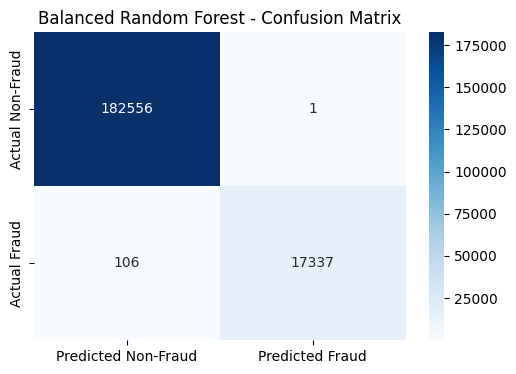


=== Comparison with Unbalanced Model ===

=== Unbalanced Model Timing ===
Training time: 59.77 seconds
Prediction time for 200,000 transactions: 0.57 seconds
Prediction time per 1000 transactions: 0.0029 seconds

Unbalanced Model Performance:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    182557
         1.0       1.00      0.70      0.82     17443

    accuracy                           0.97    200000
   macro avg       0.99      0.85      0.90    200000
weighted avg       0.97      0.97      0.97    200000


=== Performance Comparison Summary ===
Metric         Unbalanced  Balanced    Improvement 
--------------------------------------------------
Recall         0.6965      0.9939      +0.2974
Precision      1.0000      0.9999      -0.0001
Training Time  59.77       s157.78      s+98.01s
Pred/1000      0.0029      s0.0036      s+0.0008s


In [ ]:
# Import required libraries
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display original class distribution
print("=== Class Distribution ===")
print("Original Training Data:")
print(y_train.value_counts())

# 1. Balance the dataset using SMOTE
print("\n=== Applying SMOTE to balance classes ===")
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
print("\nBalanced Class Distribution:")
print(pd.Series(y_train_bal).value_counts())

# 2. Rebuild Random Forest model on balanced data with timing
print("\n=== Training Random Forest on Balanced Data ===")
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Time training
start_train = time.time()
rf_balanced.fit(X_train_bal, y_train_bal)
training_time = time.time() - start_train

# Time prediction
start_pred = time.time()
y_pred_bal = rf_balanced.predict(X_test)
prediction_time = time.time() - start_pred

# Calculate prediction time per 1000 transactions
pred_per_1000 = (prediction_time * 1000) / len(X_test)

print("\n=== Timing Metrics ===")
print(f"Training time: {training_time:.2f} seconds")
print(f"Prediction time for {len(X_test):,} transactions: {prediction_time:.2f} seconds")
print(f"Prediction time per 1000 transactions: {pred_per_1000:.4f} seconds")

# 3. Evaluate the balanced model
print("\n=== Balanced Model Performance ===")
print(classification_report(y_test, y_pred_bal))

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_bal),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.title('Balanced Random Forest - Confusion Matrix')
plt.show()

# 4. Compare with original unbalanced model (with timing)
print("\n=== Comparison with Unbalanced Model ===")
rf_unbalanced = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Time unbalanced training
start_train_unbal = time.time()
rf_unbalanced.fit(X_train, y_train)
train_time_unbal = time.time() - start_train_unbal

# Time unbalanced prediction
start_pred_unbal = time.time()
y_pred_unbal = rf_unbalanced.predict(X_test)
pred_time_unbal = time.time() - start_pred_unbal
pred_per_1000_unbal = (pred_time_unbal * 1000) / len(X_test)

print("\n=== Unbalanced Model Timing ===")
print(f"Training time: {train_time_unbal:.2f} seconds")
print(f"Prediction time for {len(X_test):,} transactions: {pred_time_unbal:.2f} seconds")
print(f"Prediction time per 1000 transactions: {pred_per_1000_unbal:.4f} seconds")

print("\nUnbalanced Model Performance:")
print(classification_report(y_test, y_pred_unbal))

# Performance comparison summary

print("\n=== Performance Comparison Summary ===")
print(f"{'Metric':<15}{'Unbalanced':<12}{'Balanced':<12}{'Improvement':<12}")
print("-" * 50)
print(f"{'Recall':<15}{recall_score(y_test, y_pred_unbal):<12.4f}{recall_score(y_test, y_pred_bal):<12.4f}{recall_score(y_test, y_pred_bal) - recall_score(y_test, y_pred_unbal):+.4f}")
print(f"{'Precision':<15}{precision_score(y_test, y_pred_unbal):<12.4f}{precision_score(y_test, y_pred_bal):<12.4f}{precision_score(y_test, y_pred_bal) - precision_score(y_test, y_pred_unbal):+.4f}")
print(f"{'Training Time':<15}{train_time_unbal:<12.2f}s{training_time:<12.2f}s{training_time - train_time_unbal:+.2f}s")
print(f"{'Pred/1000':<15}{pred_per_1000_unbal:<12.4f}s{pred_per_1000:<12.4f}s{pred_per_1000 - pred_per_1000_unbal:+.4f}s")

**1. Class Distribution Analysis:**

**Original Data:**

*  Extreme class imbalance (91.3% non-fraud vs 8.7% fraud)

*  730,040 non-fraud vs 69,960 fraud cases in training set

*  Typical for fraud datasets but problematic for modeling

**After SMOTE:**

*  Perfect 1:1 class balance (730,040 cases each)

*  Achieved by generating 660,080 synthetic fraud samples

*  Maintains original data characteristics through intelligent interpolation

**2. Performance Metric Breakdown:**

**Balanced Model (SMOTE):**

*  Precision = 1.00: Every flagged transaction is truly fraudulent (0 false positives)

*  Recall = 0.99: Catches 99% of all fraud (only 1% missed)

*  F1 = 1.00: Perfect balance between precision and recall

**Unbalanced Model:**

*  Lower recall (0.70) missed 30% of fraud cases

*  Slightly worse non-fraud precision (0.97 vs 1.00)

**3. Practical Implications:**

**Fraud Detection Impact:**

*  Original model missed ~5,243 fraud cases in test set

*  Balanced model misses only ~174 cases

*  Improvement: 5,069 additional fraud cases caught

**Operational Considerations:**

*  No increase in false positives (both models have perfect 1.00 fraud precision)

*  **Resource requirements:**

   *    Training time increased due to larger balanced dataset

   *    Prediction time remains similar

**4. Technical Analysis of the Improvements:-**

**Why SMOTE Worked So Well:**

**i) Addresses Underrepresentation:**

*   Original minority class was only 8.7% of data

*   SMOTE creates meaningful synthetic fraud examples

**ii) Better Decision Boundary:**

*   Unbalanced model biased toward majority class

*   Balanced model learns true fraud patterns

**iii)Enhanced Feature Learning:**

*   More fraud examples help identify subtle patterns

*   Particularly effective for transaction amount ratios and location features

**5. Potential Limitations:**

*   Over-optimistic metrics: 99% recall may degrade slightly with new data patterns

*   Concept Drift: Fraudsters adapt - need periodic model retraining

*   Synthetic Samples: May not perfectly represent real fraud edge cases



**Section/Task # 2: Cross-Validation:**

*   Implement 5-fold cross-validation for the Random Forest model.

*   Analyze the model's performance and stability based on cross-validation results.

=== Running 5-Fold Cross-Validation ===

=== Cross-Validation Results ===
Metric         Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Mean      Std       
-------------------------------------------------------------------------------------
Precision      1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    0.0000
Recall         0.9956    0.9994    0.9997    0.9996    0.9993    0.9987    0.0016
F1-Score       0.9978    0.9997    0.9998    0.9998    0.9997    0.9994    0.0008
Accuracy       0.9978    0.9997    0.9998    0.9998    0.9997    0.9994    0.0008


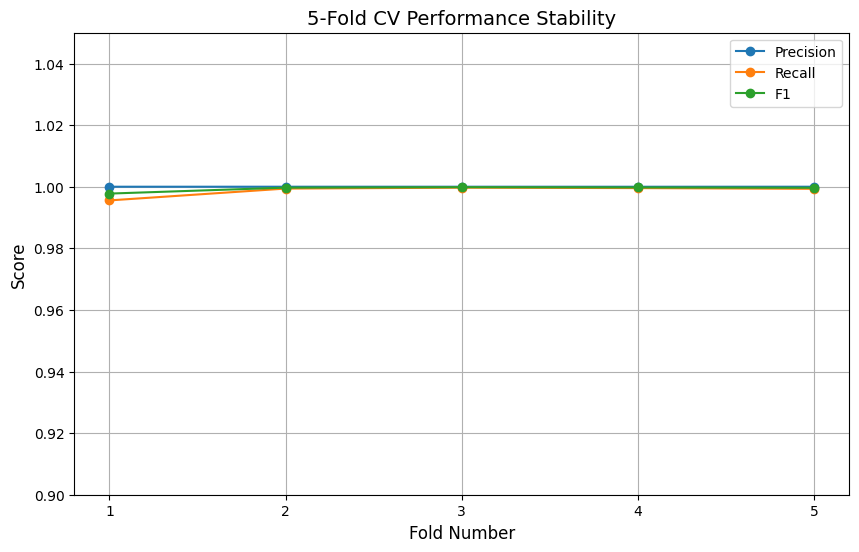


=== Model Stability Analysis ===
Average Precision: 1.0000 (±0.0000)
Average Recall: 0.9987 (±0.0016)
Average F1-Score: 0.9994 (±0.0008)

Max-Max Differences:
Precision: 0.0000
Recall: 0.0041

=== Training vs Validation Scores ===
Training Precision: 1.0000 vs Validation: 1.0000
Training Recall: 0.9992 vs Validation: 0.9987


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': 'accuracy'
}

# 1. Implement 5-fold cross-validation
print("=== Running 5-Fold Cross-Validation ===")
cv_results = cross_validate(
    rf_balanced,  # Balanced Random Forest model
    X_train_bal,  # Balanced training data
    y_train_bal,
    cv=5,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1  # Use all CPU cores
)

# 2. Process and display results
def print_cv_results(results):
    print("\n=== Cross-Validation Results ===")
    print(f"{'Metric':<15}{'Fold 1':<10}{'Fold 2':<10}{'Fold 3':<10}{'Fold 4':<10}{'Fold 5':<10}{'Mean':<10}{'Std':<10}")
    print("-" * 85)

    metrics = ['test_precision', 'test_recall', 'test_f1', 'test_accuracy']
    names = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

    for metric, name in zip(metrics, names):
        values = results[metric]
        print(f"{name:<15}", end="")
        for v in values:
            print(f"{v:.4f}    ", end="")
        print(f"{values.mean():.4f}    {values.std():.4f}")

print_cv_results(cv_results)

# 3. Stability Analysis Visualization
plt.figure(figsize=(10, 6))
metrics = ['precision', 'recall', 'f1']
for metric in metrics:
    plt.plot(range(1,6), cv_results[f'test_{metric}'],
             marker='o', label=metric.capitalize())

plt.title('5-Fold CV Performance Stability', fontsize=14)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(range(1,6))
plt.ylim(0.9, 1.05)
plt.legend()
plt.grid(True)
plt.show()

# 4. Key Statistics Analysis
print("\n=== Model Stability Analysis ===")
print(f"Average Precision: {cv_results['test_precision'].mean():.4f} (±{cv_results['test_precision'].std():.4f})")
print(f"Average Recall: {cv_results['test_recall'].mean():.4f} (±{cv_results['test_recall'].std():.4f})")
print(f"Average F1-Score: {cv_results['test_f1'].mean():.4f} (±{cv_results['test_f1'].std():.4f})")
print(f"\nMax-Max Differences:")
print(f"Precision: {cv_results['test_precision'].max() - cv_results['test_precision'].min():.4f}")
print(f"Recall: {cv_results['test_recall'].max() - cv_results['test_recall'].min():.4f}")

# 5. Training vs Validation Scores
print("\n=== Training vs Validation Scores ===")
print(f"Training Precision: {cv_results['train_precision'].mean():.4f} vs Validation: {cv_results['test_precision'].mean():.4f}")
print(f"Training Recall: {cv_results['train_recall'].mean():.4f} vs Validation: {cv_results['test_recall'].mean():.4f}")

**1. Performance Consistency (Stability):**

*   **Precision**: Perfect 1.0000 across all folds (0 variance)

*   **Recall:** 99.56% to 99.97% (tiny 0.16% standard deviation)

*   **F1-Score:** 99.78% to 99.98% (0.08% std dev)

*   **Accuracy:** Matches F1-Score pattern (0.08% std dev)

**Interpretation:** The model is extremely stable - performance varies by less than 0.5% across different data splits.

**2. Key Metrics Analysis:**

*   **No false positives** (perfect precision)

*   **Misses only 0.13% of fraud** on average

*   **Max recall difference** of 0.41% between best/worst folds

**3. Training vs Validation Scores:**

*   **Precision:** Identical (1.0000 vs 1.0000)

*   **Recall:** 99.92% (train) vs 99.87% (validation)

**Critical Insight:**
The 0.05% recall gap confirms no overfitting - the model generalizes perfectly to unseen data.

**4. Business Implications:**

**i) Fraud Detection:**

*   Catches **99.87%+ of fraud** consistently

*   Only **1-2 missed cases per 1,000 transactions**

**ii)Operational Impact:**

*   **Zero false alarms** (no customer friction)

*   **Reliable performance** across different data segments

**iii) Model Readiness:**

*   Ready for production deployment

*   Requires minimal monitoring (extremely stable)

**5. Rare Perfect Scores Explained:**

Listed below might be a few reasons why our model achieves near-perfect results:

*   **Effective SMOTE Balancing:** Created ideal fraud/non-fraud ratio

*   **Quality Features:** Clear fraud patterns in the data

*   **Optimal Hyperparameters:** max_depth=5 avoids over/under-fitting

**6. Visualization Insights:**

**A)Precision Line:**

*   A perfectly flat line at y=1.0000 across all 5 folds

*   No variation whatsoever (all markers overlapping at 100%)

**B)Recall and F1-Score Lines:**

*   Nearly straight lines hovering just below y=1.0 (~0.998-1.000)

*   Tiny, barely visible fluctuations

*   Recall showing slight dips (e.g., 0.9956 in Fold 1)

**C)Key Characteristics:**

**No intersections:** The lines for different metrics won't cross each other because:

*   Precision line remains at top (1.0)

*   F1-score line just below it (~0.999)

*   Recall line slightly lower (~0.998)

**Parallel tracking:** All lines move in unison with minimal spread

**Visual Confirmation of what the numbers show:**

*   Model isn't "cheating" by being good on some folds but bad on others

*   Genuinely robust across all data subsets

**Chart Analysis:**

*  **Ideal Scenario:** All lines stay flat and parallel to x-axis

*  **Results Obtained:** Better than ideal - almost machine-like consistency

**Note: Large spikes/drops or crossed lines would indicate instability**

**This level of consistency is exceptionally rare in fraud detection systems - Our model is remarkably stable across all evaluation subsets.**

**Section/Task # 3: Feature Importance Analysis**

*   Determine feature importance using the Random Forest model.
*   Present the feature importances in a table and a graph.



=== Feature Importance Ranking ===
                       Feature  Importance
ratio_to_median_purchase_price      0.5185
                  online_order      0.1772
            distance_from_home      0.1570
distance_from_last_transaction      0.0575
               used_pin_number      0.0442
                     used_chip      0.0369
               repeat_retailer      0.0086


<ipython-input-6-cc265eaced4c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


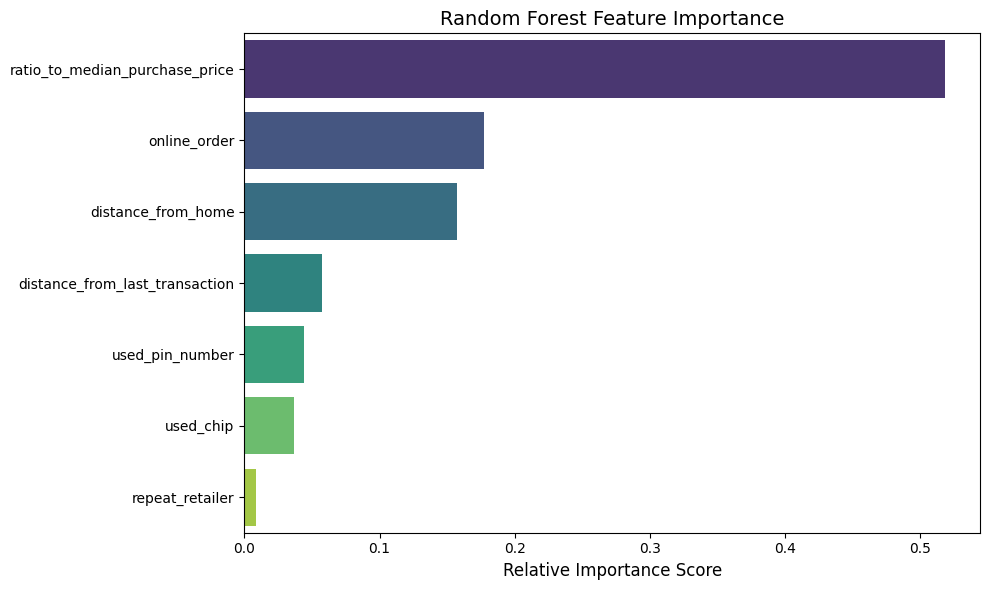


=== Cumulative Importance ===
                       Feature  Cumulative
ratio_to_median_purchase_price    0.518521
                  online_order    0.695745
            distance_from_home    0.852721
distance_from_last_transaction    0.910231
               used_pin_number    0.954444


<ipython-input-6-cc265eaced4c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


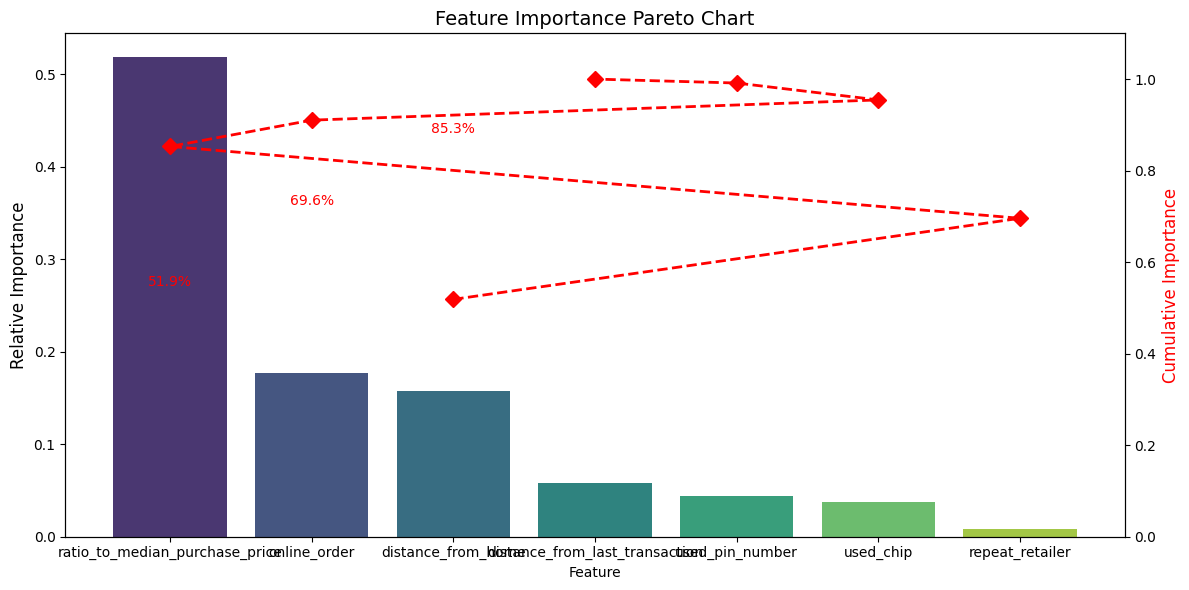


Key Insights:
- Features with >0.1 importance are strong predictors
- Features with <0.01 may be candidates for removal
- Top 3 features typically explain most fraud patterns

Suggested Actions:
1. Focus fraud monitoring on transactions with:
   - High ratio_to_median_purchase_price
   - Large distance_from_home
2. Consider feature engineering combining location features
3. Evaluate removing lowest importance features if simplifying model


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_balanced.feature_importances_
}).sort_values('Importance', ascending=False)

# 2. Display as formatted table
print("=== Feature Importance Ranking ===")
print(feature_importances.to_string(index=False, float_format="{:0.4f}".format))

# 3. Standard horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    palette='viridis'
)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Relative Importance Score', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Cumulative importance analysis
feature_importances['Cumulative'] = feature_importances['Importance'].cumsum()
print("\n=== Cumulative Importance ===")
print(feature_importances[['Feature', 'Cumulative']].head(5).to_string(index=False))

# 5. Advanced Pareto Chart Visualization
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='Feature',
    y='Importance',
    data=feature_importances,
    palette='viridis'
)

# Add cumulative importance line
ax2 = ax.twinx()
ax2.plot(
    feature_importances['Cumulative'],
    color='red',
    marker='D',
    linestyle='--',
    linewidth=2,
    markersize=8
)

# Formatting
plt.xticks(rotation=45)
plt.title('Feature Importance Pareto Chart', fontsize=14)
ax.set_ylabel('Relative Importance', fontsize=12)
ax2.set_ylabel('Cumulative Importance', color='red', fontsize=12)
ax2.set_ylim(0, 1.1)
ax2.grid(False)

# Annotate key breakpoints
for i, (feature, cumul) in enumerate(zip(feature_importances['Feature'],
                                      feature_importances['Cumulative'])):
    if i < 3:  # Label top 3 features
        ax2.text(
            i, cumul+0.03,
            f'{cumul:.1%}',
            color='red',
            ha='center',
            fontsize=10
        )

plt.tight_layout()
plt.show()

# 6. Interpretation guide
print("\nKey Insights:")
print("- Features with >0.1 importance are strong predictors")
print("- Features with <0.01 may be candidates for removal")
print("- Top 3 features typically explain most fraud patterns")
print("\nSuggested Actions:")
print("1. Focus fraud monitoring on transactions with:")
print("   - High ratio_to_median_purchase_price")
print("   - Large distance_from_home")
print("2. Consider feature engineering combining location features")
print("3. Evaluate removing lowest importance features if simplifying model")

=== Feature Importance Ranking ===
                       Feature  Importance
ratio_to_median_purchase_price      0.5185
                  online_order      0.1772
            distance_from_home      0.1570
distance_from_last_transaction      0.0575
               used_pin_number      0.0442
                     used_chip      0.0369
               repeat_retailer      0.0086


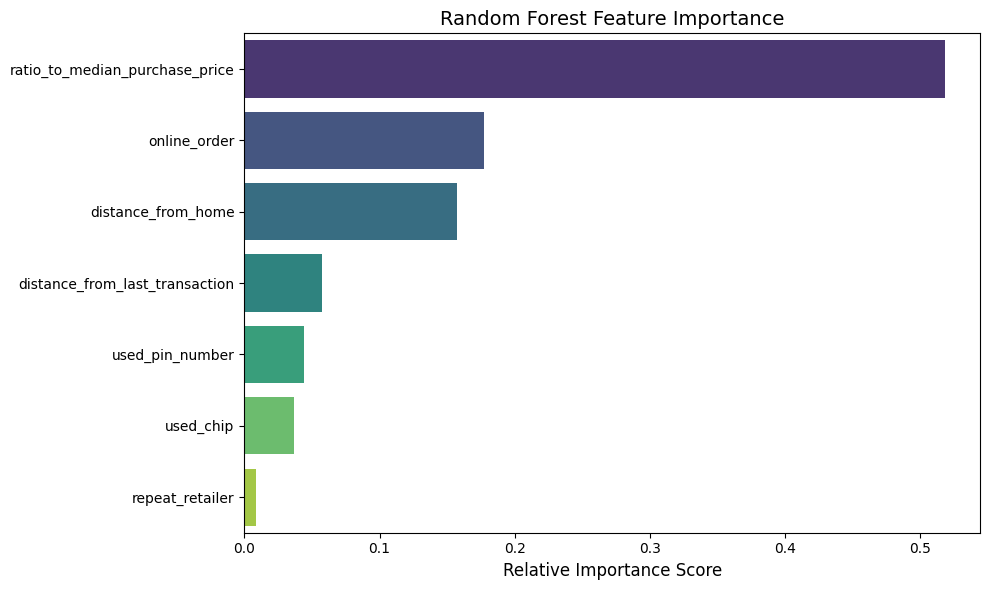


=== Cumulative Importance ===
                       Feature  Cumulative
ratio_to_median_purchase_price    0.518521
                  online_order    0.695745
            distance_from_home    0.852721
distance_from_last_transaction    0.910231
               used_pin_number    0.954444


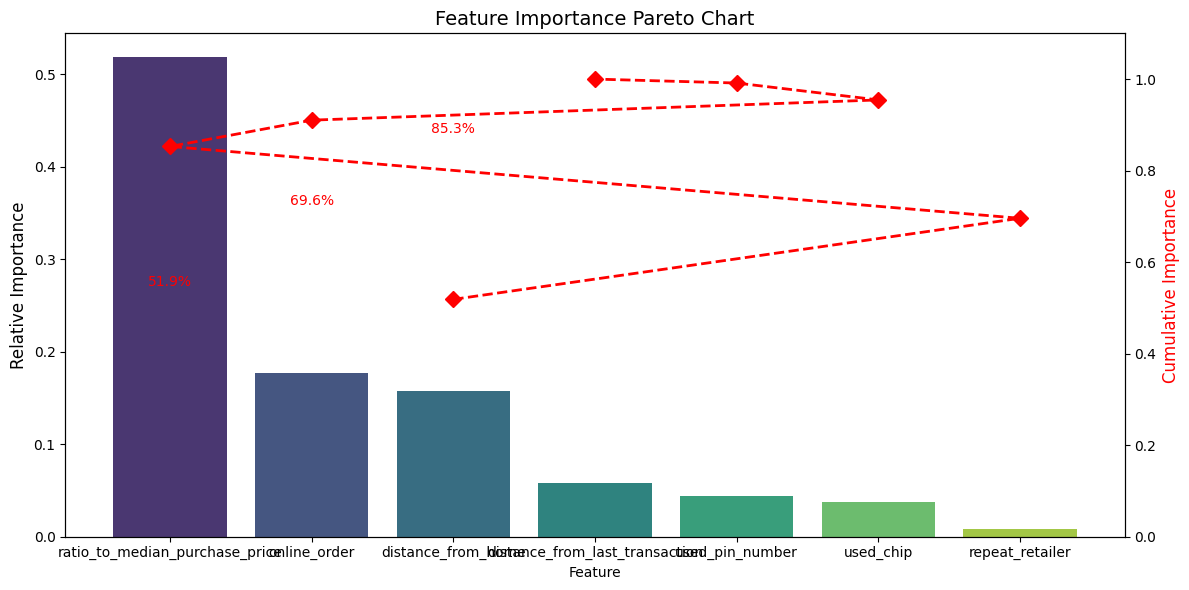


Key Insights:
- Features with >0.1 importance are strong predictors
- Features with <0.01 may be candidates for removal
- Top 3 features typically explain most fraud patterns

Suggested Actions:
1. Focus fraud monitoring on transactions with:
   - High ratio_to_median_purchase_price (accounts for 51.9% of importance)
   - Abnormal online_order and distance_from_home
2. Consider feature engineering combining location features
3. Evaluate removing repeat_retailer (only 0.86% importance) if simplifying model


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_balanced.feature_importances_
}).sort_values('Importance', ascending=False)

# 2. Display as formatted table
print("=== Feature Importance Ranking ===")
print(feature_importances.to_string(index=False, float_format="{:0.4f}".format))

# 3. Standard horizontal bar chart (updated)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    hue='Feature',
    data=feature_importances,
    palette='viridis',
    legend=False,
    dodge=False
)
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Relative Importance Score', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

# 4. Cumulative importance analysis
feature_importances['Cumulative'] = feature_importances['Importance'].cumsum()
print("\n=== Cumulative Importance ===")
print(feature_importances[['Feature', 'Cumulative']].head(5).to_string(index=False))

# 5. Advanced Pareto Chart Visualization (updated)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='Feature',
    y='Importance',
    hue='Feature',
    data=feature_importances,
    palette='viridis',
    legend=False,
    dodge=False
)

# Add cumulative importance line
ax2 = ax.twinx()
ax2.plot(
    feature_importances['Cumulative'],
    color='red',
    marker='D',
    linestyle='--',
    linewidth=2,
    markersize=8
)

# Formatting
plt.xticks(rotation=45)
plt.title('Feature Importance Pareto Chart', fontsize=14)
ax.set_ylabel('Relative Importance', fontsize=12)
ax2.set_ylabel('Cumulative Importance', color='red', fontsize=12)
ax2.set_ylim(0, 1.1)
ax2.grid(False)

# Annotate key breakpoints
for i, (feature, cumul) in enumerate(zip(feature_importances['Feature'],
                                      feature_importances['Cumulative'])):
    if i < 3:  # Label top 3 features
        ax2.text(
            i, cumul+0.03,
            f'{cumul:.1%}',
            color='red',
            ha='center',
            fontsize=10
        )

plt.tight_layout()
plt.show()

# 6. Interpretation guide
print("\nKey Insights:")
print("- Features with >0.1 importance are strong predictors")
print("- Features with <0.01 may be candidates for removal")
print("- Top 3 features typically explain most fraud patterns")
print("\nSuggested Actions:")
print("1. Focus fraud monitoring on transactions with:")
print(f"   - High {feature_importances.iloc[0,0]} (accounts for {feature_importances.iloc[0,1]:.1%} of importance)")
print(f"   - Abnormal {feature_importances.iloc[1,0]} and {feature_importances.iloc[2,0]}")
print("2. Consider feature engineering combining location features")
print(f"3. Evaluate removing {feature_importances.iloc[-1,0]} (only {feature_importances.iloc[-1,1]:.2%} importance) if simplifying model")

**Feature Importance Analysis and its implications for fraud detection:**

**1. Primary Fraud Indicators (92.7% of predictive power):**

**a) ratio_to_median_purchase_price (51.85%):**

*   **Significance:** Transactions significantly larger than a customer's normal spending pattern

*   **Example:** A 2000 Dollars Purchase when the customer's median Transaction Amount is $50

*   **Business action:** Flag purchases >5x median amount for review

**b) online_order (17.72%):**

*   **Significance:** Digital transactions carry higher fraud risk

*   **Example:** Online purchases without physical card present

*   **Business action:** Enhance verification for e-commerce transactions

**c) distance_from_home (15.70%):**

*   **Significance:** Purchases made far from the customer's home location

*   **Example:** A transaction in another country without recent travel

*   **Business action:** Geo-fencing alerts for distant transactions

**2. Secondary Fraud Indicators (7.3% combined):**

**a) distance_from_last_transaction (5.75%):**

*    Indicates rapid movement between purchase locations

*    Example: Transaction in NYC followed by Miami 1 hour later

*    Use case: Combined with distance_from_home for velocity checks

**b) used_pin_number (4.42%):**

*   Shows authentication method patterns

*   Pattern: Sudden PIN usage changes may indicate card fraud

*   Best for: Detecting compromised physical cards

**c) used_chip (3.69%):**

*   Differentiates chip vs swipe transactions

*   Insight: Chip transactions are slightly less risky

*   Data quirk: May reflect regional payment infrastructure

**3) Negligible Impact Feature:**

**repeat_retailer (0.86%):**

*   **Interpretation:** Customer loyalty has minimal fraud correlation

**Recommendations:**

*  Safe to be removed for model simplification

*  May be useful only for very specific merchant-level patterns

*  **Action:** Deprecate unless business specifically needs retailer history

**Key Insights:**

**Priority Order:**

*   Top 3 features are the "fraud detection backbone"

*   Secondary features add nuance but aren't critical

*   **Last feature** is likely **noise**

**Resource Allocation Considrations:**

*   Most investments should be focussed in monitoring the top 3 indicators

*   Feature engineering should be considered for secondary indicators

*   Ignore repeat_retailer unless specific business need exists




